# Analyses of clinical data for breast cancer patients
Structured clinical data can be found [here](https://data.poltekkes-smg.ac.id/dataset/breast-cancer/resource/c759b693-ac63-431b-aca8-10bee206188d)

In [1]:
import pandas as pd
import os
import requests

In [2]:
import os
import urllib.request

# File name and URL
file_name = "archive-1.zip"
url = "https://data.poltekkes-smg.ac.id/dataset/7627060d-81f1-4393-9ec0-c49740efbf6a/resource/c759b693-ac63-431b-aca8-10bee206188d/download/archive-1.zip"

# Check if the file exists, if not, download it
if not os.path.isfile(file_name):
    print(f"{file_name} does not exist. Downloading...")
    urllib.request.urlretrieve(url, file_name)
    print(f"Downloaded {file_name}.")
else:
    print(f"{file_name} already exists.")

archive-1.zip already exists.


In [3]:
df = pd.read_csv("archive-1.zip")

# Structure and five number summaries

In [4]:
df.columns

Index(['Age', 'Race', 'Marital Status', 'T Stage ', 'N Stage', '6th Stage',
       'differentiate', 'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status',
       'Progesterone Status', 'Regional Node Examined',
       'Reginol Node Positive', 'Survival Months', 'Status'],
      dtype='object')

Note the typos! `T Stage ` and `Reginol` 

In [5]:
df.describe(include="all")

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
count,4024.000000,4024,4024,4024,4024,4024,4024,4024,4024,4024.000000,4024,4024,4024.000000,4024.000000,4024.000000,4024
unique,NaN,3,5,4,3,5,4,4,2,NaN,2,2,NaN,NaN,NaN,2
top,NaN,White,Married,T2,N1,IIA,Moderately differentiated,2,Regional,NaN,Positive,Positive,NaN,NaN,NaN,Alive
freq,NaN,3413,2643,1786,2732,1305,2351,2351,3932,NaN,3755,3326,NaN,NaN,NaN,3408
mean,53.972167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.473658,NaN,NaN,14.357107,4.158052,71.297962,NaN
std,8.963134,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.119696,NaN,NaN,8.099675,5.109331,22.921430,NaN
min,30.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,1.000000,1.000000,1.000000,NaN
25%,47.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.000000,NaN,NaN,9.000000,1.000000,56.000000,NaN
50%,54.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.000000,NaN,NaN,14.000000,2.000000,73.000000,NaN
75%,61.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.000000,NaN,NaN,19.000000,5.000000,90.000000,NaN


# Univariate statistics

## Population

<Axes: ylabel='Race'>

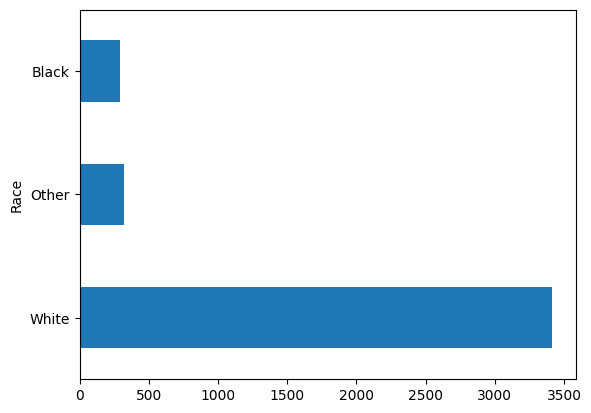

In [6]:
df["Race"].value_counts().plot.barh()

<Axes: ylabel='Frequency'>

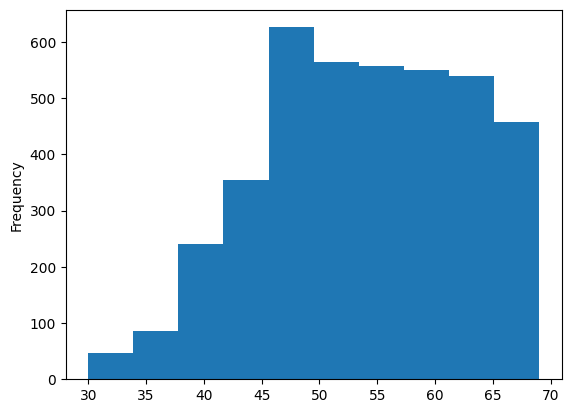

In [7]:
df["Age"].plot.hist()

## Cancer-specific

<Axes: ylabel='differentiate'>

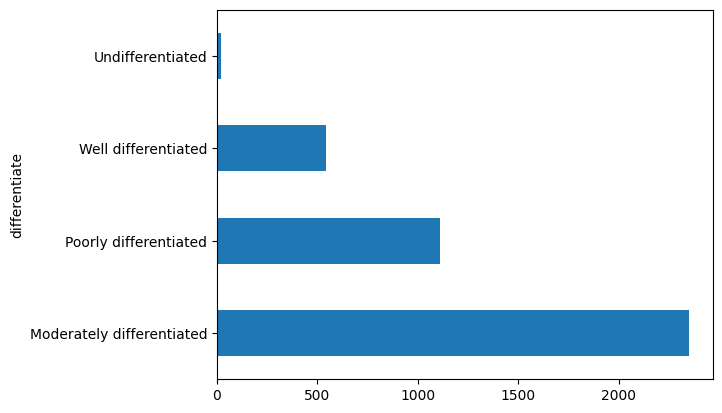

In [8]:
df["differentiate"].value_counts().plot.barh()

<Axes: ylabel='A Stage'>

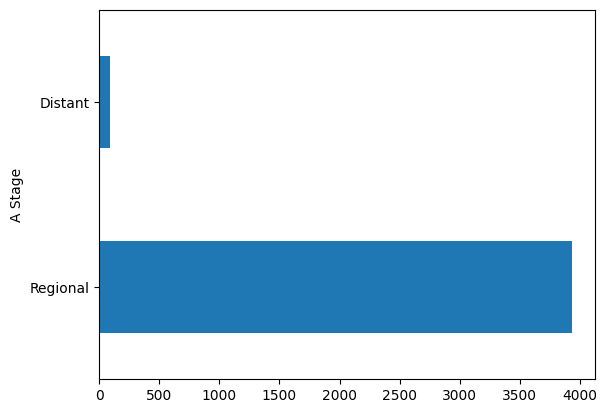

In [9]:
df["A Stage"].value_counts().plot.barh()

<Axes: ylabel='Grade'>

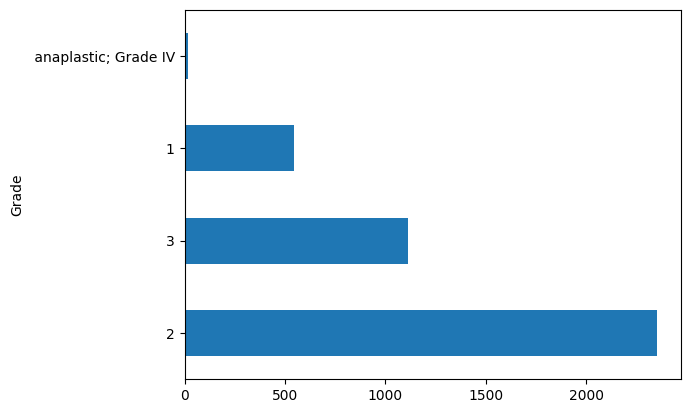

In [10]:
df["Grade"].value_counts().plot.barh()

<Axes: ylabel='Frequency'>

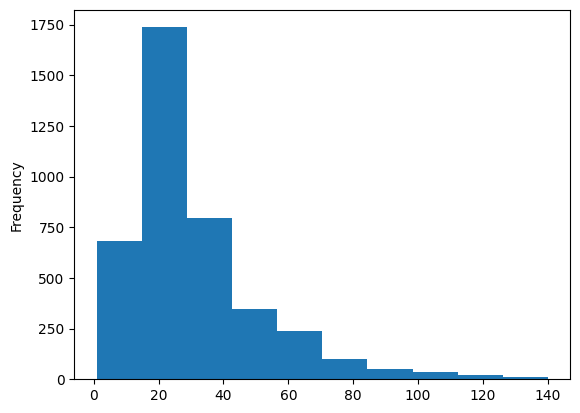

In [11]:
df["Tumor Size"].plot.hist()

# Bivariate

<Axes: xlabel='N Stage', ylabel='T Stage '>

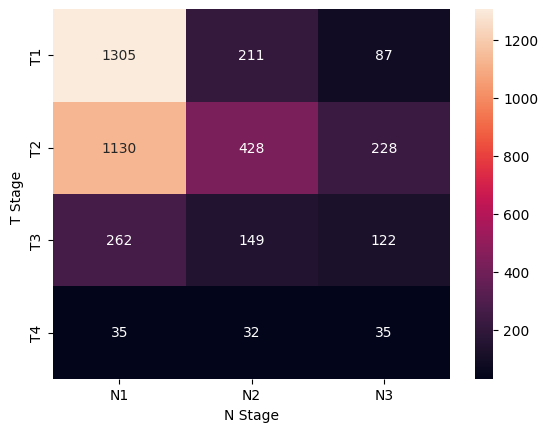

In [12]:
import seaborn as sns
sns.heatmap(pd.crosstab(df["T Stage "], df["N Stage"]), annot=True, fmt=".0f")

<Axes: xlabel='6th Stage', ylabel='T Stage '>

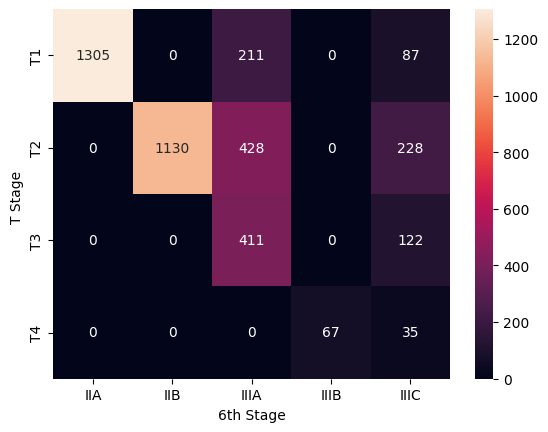

In [13]:
sns.heatmap(pd.crosstab(df["T Stage "], df["6th Stage"]), annot=True, fmt=".0f")

<Axes: >

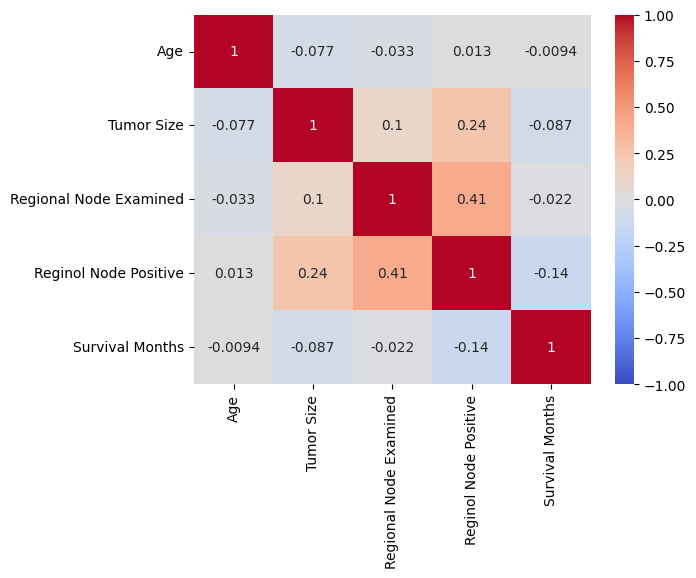

In [14]:
sns.heatmap(df.corr(numeric_only=True), vmin=-1, vmax=1, cmap="coolwarm", annot=True)

`pandas` can not calculate significance levels

In [15]:
from scipy.stats import pearsonr
import numpy as np
pvalues = df.corr(numeric_only=True, method=lambda x, y: pearsonr(x, y)[1])
pvalues

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months
Age,1.000000e+00,9.393665e-07,3.441274e-02,4.247860e-01,5.515395e-01
Tumor Size,9.393665e-07,1.000000e+00,3.231356e-11,7.283309e-55,3.364714e-08
Regional Node Examined,3.441274e-02,3.231356e-11,1.000000e+00,2.421810e-164,1.618896e-01
Reginol Node Positive,4.247860e-01,7.283309e-55,2.421810e-164,1.000000e+00,7.042408e-18
Survival Months,5.515395e-01,3.364714e-08,1.618896e-01,7.042408e-18,1.000000e+00


In [16]:
pearsonr(df["Reginol Node Positive"], df["Survival Months"])

PearsonRResult(statistic=np.float64(-0.13521384862427394), pvalue=np.float64(7.042407821543756e-18))

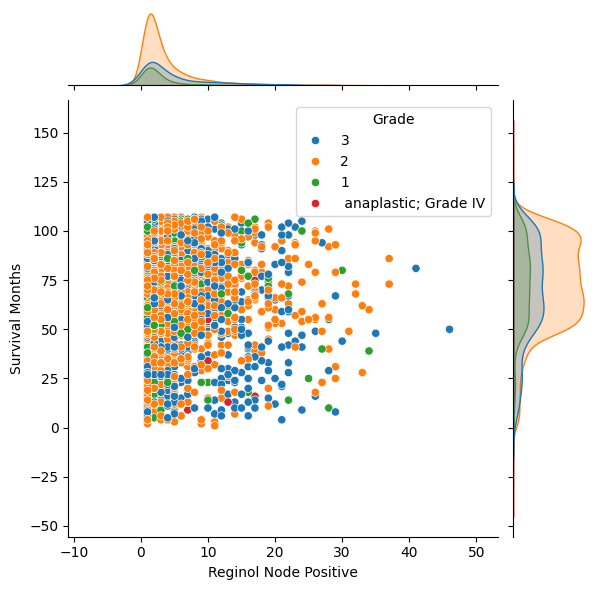

In [17]:
sns.jointplot(df, x="Reginol Node Positive", y="Survival Months", hue="Grade")

In [18]:
df_g3 = df[df["Grade"]=="3"]

<Axes: >

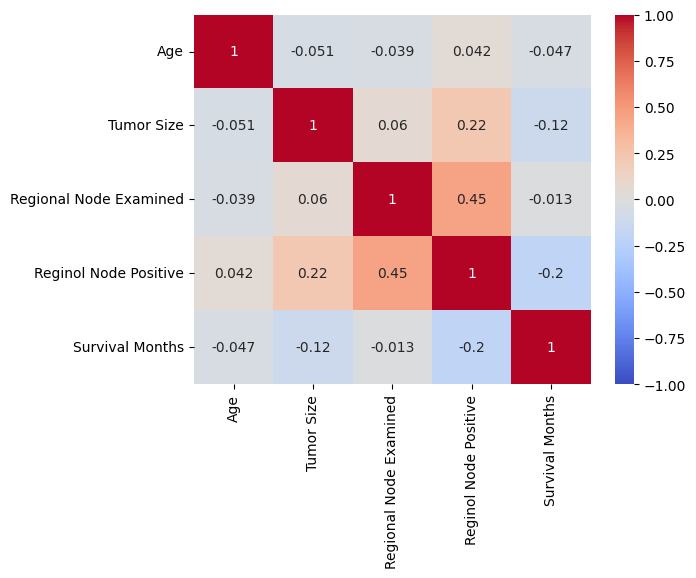

In [19]:
sns.heatmap(df_g3.corr(numeric_only=True), annot=True, vmin=-1, vmax=1, cmap="coolwarm")

In [20]:
df["6th Stage"].value_counts()

6th Stage
IIA     1305
IIB     1130
IIIA    1050
IIIC     472
IIIB      67
Name: count, dtype: int64

<Axes: xlabel='Status', ylabel='6th Stage'>

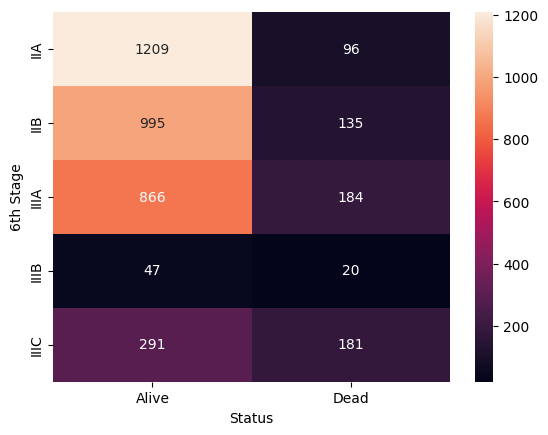

In [21]:
sns.heatmap(pd.crosstab(df["6th Stage"], df["Status"]), annot=True, fmt=".0f")

In [22]:
df.groupby("N Stage").agg({ "Survival Months": "mean" })

,Survival Months
N Stage,
N1,73.169107
N2,69.714634
N3,63.218220
